### Forecasting Timeseries Data Using Facebook FbProphet

Steps required with FbProphet
1. Introduction and Installation
2. Data Preprocessing with the time series
3. Model Fitting
4. Obtaining the Forecast
5. Plotting the Forecast
6. Cross-Validation
7. Computing performance matrix
8. Visualize the perforance matrix
9. Comclusions

In [1]:
# !pip install pystan
# !conda install -c conda-forge fbprophet

In [2]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [3]:
df= pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns

Index(['Month', 'Monthly milk production: pounds per cow. Jan 62 ? Dec 75'], dtype='object')

In [5]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [6]:
df.drop(168,axis=0, inplace=True)

In [7]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [8]:
df.columns=['ds','y'] # These names are according to the facebook documentation

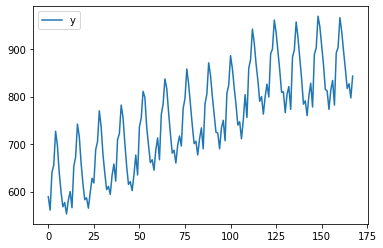

In [9]:
df.plot()

In [10]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [11]:
df['ds'] = pd.to_datetime(df['ds']) # Here data is converted in datetime format

In [12]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


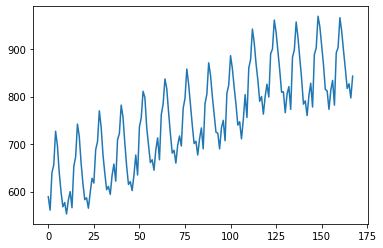

In [13]:
df['y'].plot() # we have to convert this seasonality data into stationary data

In [14]:
df['y'].shift(1)

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [15]:
#### Shifting to make it stationary (These operation is not required in these)
###df['y'] = df['y'] - df['y'].shift(1)

In [16]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


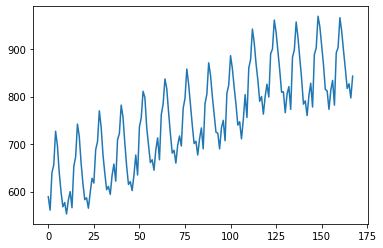

In [17]:
df['y'].plot()

In [18]:
from fbprophet import Prophet

In [19]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [20]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [21]:
### Initialize the model
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
model

In [23]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [24]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [25]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [26]:
#### Create future date of 365 days
future_dates = model.make_future_dataframe(periods=365)
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [27]:
### Prediction
prediction  = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.810747,576.511312,595.875031,606.810747,606.810747,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,0.0,0.0,0.0,586.697151
1,1962-02-01,608.536993,535.802387,555.964599,608.536993,608.536993,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,0.0,0.0,0.0,545.999137
2,1962-03-01,610.096182,631.229951,651.274092,610.096182,610.096182,31.410418,31.410418,31.410418,31.410418,31.410418,31.410418,0.0,0.0,0.0,641.506601
3,1962-04-01,611.822427,648.942897,668.350712,611.822427,611.822427,46.733066,46.733066,46.733066,46.733066,46.733066,46.733066,0.0,0.0,0.0,658.555494
4,1962-05-01,613.492987,710.897507,732.079219,613.492987,613.492987,108.064296,108.064296,108.064296,108.064296,108.064296,108.064296,0.0,0.0,0.0,721.557284


In [28]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.561801,804.531614,827.207741
529,1976-11-27,818.770979,807.658785,830.419649
530,1976-11-28,822.159021,811.040539,832.991401
531,1976-11-29,825.663235,814.888308,837.181733
532,1976-11-30,829.213819,817.686418,841.346237


In [29]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.697151,576.511312,595.875031
1,1962-02-01,545.999137,535.802387,555.964599
2,1962-03-01,641.506601,631.229951,651.274092
3,1962-04-01,658.555494,648.942897,668.350712
4,1962-05-01,721.557284,710.897507,732.079219


#### Ploting the Forecasts

Prohet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as argument. The blue line in the graph represent the predicted values while the black dots represents the data in our dataset.

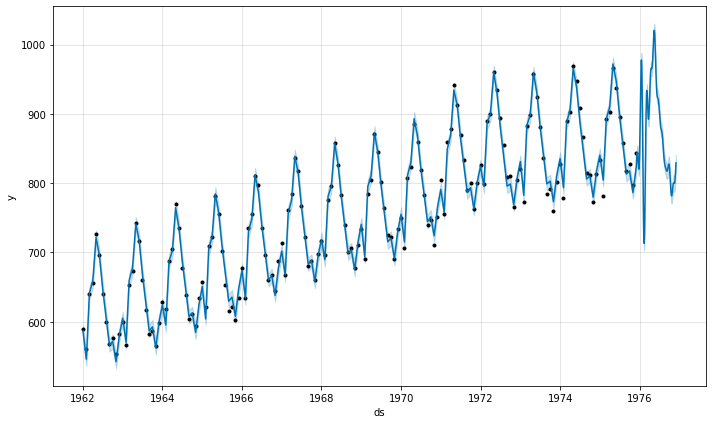

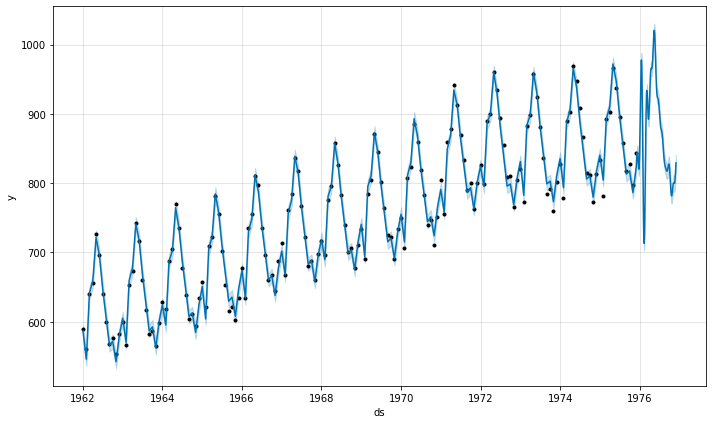

In [30]:
#### Plot the predicted projection
model.plot(prediction)

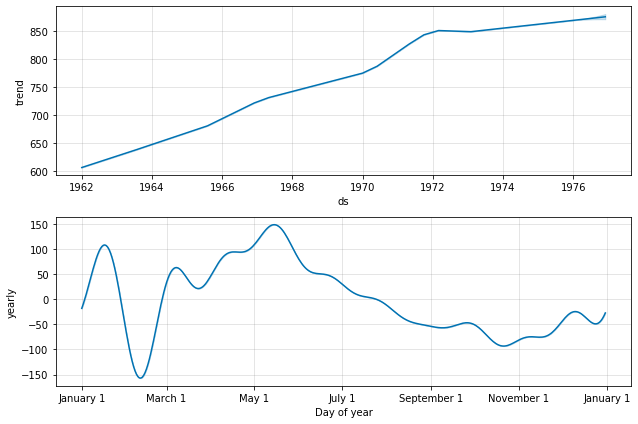

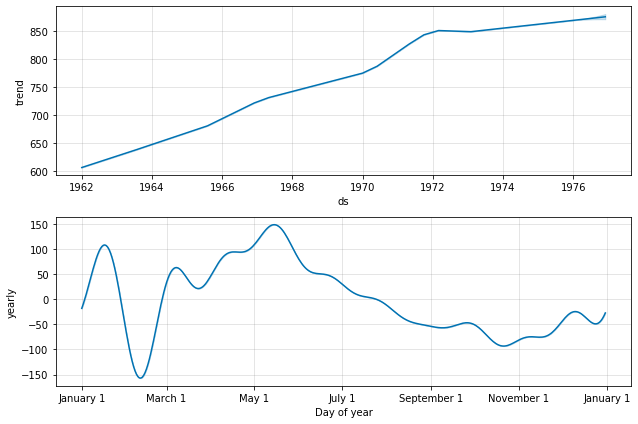

In [31]:
##### Visualize Each Components[Trends, Weekly]
model.plot_components(prediction)

#### Cross Validation

Next, let's measure the forecast error using the historical data. We'll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of the points in the history of the data and fit the model with the data upto that cut off point. Afterwords we compare the actual values to the predicted values. The cross-validation method allows us to do this in Prophet. This method take the following parameters as explained below. 

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [32]:
df.shape

(168, 2)

In [33]:
168*5

840

In [34]:
from fbprophet.diagnostics import cross_validation

In [35]:
3*365

1095

In [36]:
df_cv = cross_validation(model,horizon='365 days', period='180 days', initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [37]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,629.706391,628.081955,631.297132,622.0,1965-01-22
1,1965-03-01,712.739970,707.320883,718.463389,709.0,1965-01-22
2,1965-04-01,731.118164,719.957559,743.229865,722.0,1965-01-22
3,1965-05-01,800.091760,781.851460,819.951825,782.0,1965-01-22
4,1965-06-01,768.349331,741.179848,797.873513,756.0,1965-01-22


# In cross_validation has automatically

1964,1968 -- if whole dataset

1964-1965 -- training dataset

1965-1966 -- Test 

1966-1968 -- Validation

#### Obtaining the performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [38]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head() # mse-,ean square error, mae-mean absolute error

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,254.213828,15.944084,12.426328,0.015982,0.013692,0.36
1,41 days,252.292064,15.883704,12.348837,0.015919,0.013692,0.36
2,42 days,267.463848,16.354322,12.817196,0.016570,0.014528,0.36
3,43 days,268.236328,16.377922,12.952623,0.016783,0.014528,0.36
4,46 days,253.593855,15.924630,12.602717,0.016295,0.014528,0.36


In [39]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,254.213828,15.944084,12.426328,0.015982,0.013692,0.36
1,41 days,252.292064,15.883704,12.348837,0.015919,0.013692,0.36
2,42 days,267.463848,16.354322,12.817196,0.016570,0.014528,0.36
3,43 days,268.236328,16.377922,12.952623,0.016783,0.014528,0.36
4,46 days,253.593855,15.924630,12.602717,0.016295,0.014528,0.36
...,...,...,...,...,...,...,...
180,357 days,876.440065,29.604730,22.376918,0.028112,0.018389,0.40
181,360 days,683.253431,26.139117,19.320390,0.023951,0.017203,0.44
182,361 days,670.162569,25.887498,18.912627,0.023537,0.014779,0.44
183,362 days,652.884471,25.551604,18.184354,0.022704,0.013880,0.48


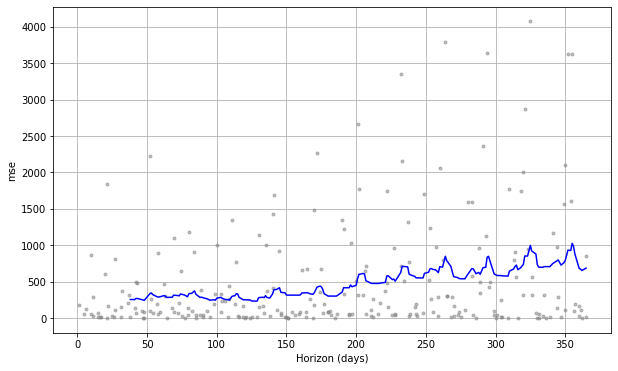

In [40]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

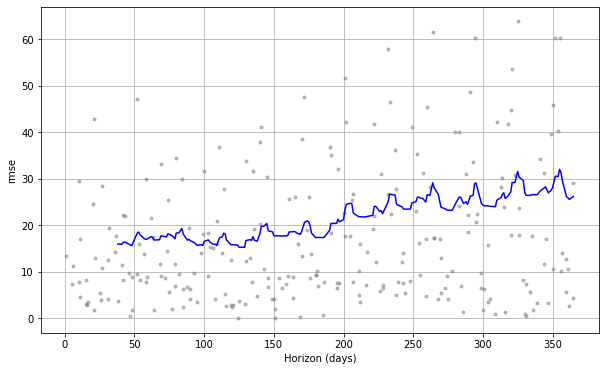

In [41]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')